+# Score in a standardised test of attainment

In [1]:
import numpy as np # import numpy package as np
import matplotlib.pyplot as plt # import pyplot package for plotting from matplotlib as plt
import pandas as pd # import pandas package for data manipulation as pd
# Set the seed so that the numbers can be reproduced.
np.random.seed(0)
mu, sigma = 95,15 # mean and standard deviation for a normal distribution
s = np.random.normal(mu, sigma, 200) # # draw 200 samples from normal distribution with mean = 95, standard deviation = 15
# assign to variable s
df = pd.DataFrame(data=s, columns = ["score"]) # create one dimensional dataframe using data in s 
# with column heading "score"; assign to variable df
plt.hist(s) # show histogram of s
df.head() # prinf girst 5 values of df


,score
0,121.460785
1,101.002358
2,109.681070
3,128.613398
4,123.013370


# Records of attendance

A [report on attendance](https://www.tusla.ie/uploads/content/School_Attendance_Data_2015-16.pdf) in DEIS schools was provide to Túsla, the child and family agency, by the Education Research Centre. The mean percentage of days lost by pupils in DEIS band 1 primary schools in the school year 2015/2016 was 8.1% with a standard deviation of 2.76 (from 174 schools sampled).


I wanted to create a column in my dataframe that simulated amount of days missed in a year for 200 pupils in DEIS primary schools. I felt that this could be modelled as a poisson process since, though pupils are sometimes absent for consecutive days due to illness, the pattern of absenteeism usually appears random when rates are high. Pupils with high absence rates often miss single days in isolation with no apparent pattern, thus satisfying the condition for a poisson process that events are independent of each other. 

,score,attendance
0,121.460785,25
1,101.002358,12
2,109.681070,17
3,128.613398,12
4,123.013370,7


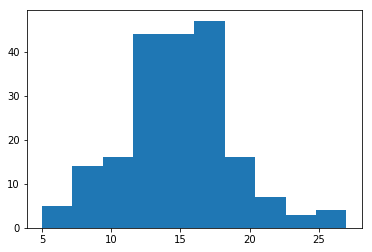

In [2]:
attendance = np.random.poisson(15, 200) # draw 200 numbers from poisson distribution with average number of successes = 15 
# assign to variable "attendance"
df["attendance"] = attendance # add variable "attendance" to dataframe "df" under column heading "attendance"
plt.hist(attendance) # show histogram of birth_month
df.head() # display first 5 rows of dataframe


# Birth Month

In the UK, chldren must start formal schooling in the Septenber after they turn 4 years old. [Research](https://www.ifs.org.uk/bns/bn122.pdf) by the Institute of Fiscal Studies for the Nuffield Foundation investigated the impact of date of birth on educational outcomes in England. They foind that children born in August scored, on average, over half a standard deviation lower than chldren born in September on standardised tests of academic attainment at age 7.

I wanted to create a column in my datframe that simulated birth month of the students. I used integers 1 - 12 as dummy variables to represent the months January - December

,score,attendance,Birth_month
0,121.460785,25,5
1,101.002358,12,7
2,109.681070,17,1
3,128.613398,12,7
4,123.013370,7,7


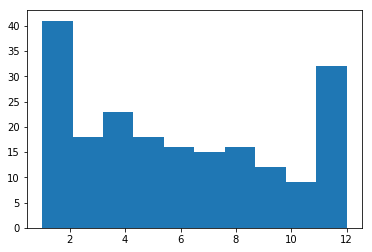

In [3]:
birth_month = np.random.randint(1,13,200)  # draw 200 integers from uniform distribution with range 1 -12(inclusive)
# assign to variable birth_month
df["Birth_month"] = birth_month # add variable "birth_month" to dataframe "df" under column heading "Birth_month"
plt.hist(birth_month) # show histogram of birth_month
df.head() # display first 5 rows of dataframe

# Class Level
Mean standard scores vary in DEIS schools by class level. In 2006, for example, the mean standard score in a 2nd Class in a DEIS school was 97.2, while the mean standard score in a 6th class was 95.9. I wanted to create a column in my dataframe that simulated the class level of the students tested

In [7]:
level = ["2nd", "3rd"] # create array populated by class levels in sample
class_level = np.random.choice(level, 200,p=[0.5, 0.5]) # generates random sample (size 200, probabilty 0.5) 
# from the "level" array and assigns to variable "class_level"
df["Class_level"] = class_level # add variable class_level to dataframe "df" under column heading "Class_level"
df.head() # display first 5 rows of dataframe

,score,attendance,Birth_month,Class_level,test-score
0,121.460785,25,5,3rd,118.142603
1,101.002358,12,7,3rd,101.520540
2,109.681070,17,1,2nd,112.290161
3,128.613398,12,7,3rd,129.131580
4,123.013370,7,7,3rd,125.531552


# The Dataset

In [5]:
df["test-score"] = df["score"] + ((6 - df["Birth_month"]) * (15/22)) + ((15 - df["attendance"]) * 0.4)
df

,score,attendance,Birth_month,Class_level,test-score
0,121.460785,25,5,3rd,118.142603
1,101.002358,12,7,3rd,101.520540
2,109.681070,17,1,2nd,112.290161
3,128.613398,12,7,3rd,129.131580
4,123.013370,7,7,2nd,125.531552
5,80.340832,16,11,2nd,76.531741
6,109.251326,12,3,2nd,112.496781
7,92.729642,16,9,3rd,90.284187
8,93.451717,13,7,3rd,93.569899
9,101.158978,15,7,2nd,100.477159
